# DALL-E Print

This is a prototype application allowing the user to:
- Input a prompt
- Use that prompt to generate a number of images
- Either create variaions of the image or accept one of the provided ones
- Create a product using that image i.e. a tshirt, a cup etc.

This notebook contains the discovery steps before creating a working application

## Setup

- Import the packages you'll need
- Import your OpenAI API key
- Set a directory to save images to

In [28]:
# imports
import openai  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images
from datetime import date
import time

# set API key
openai.api_key = os.environ.get("OPENAI_API_KEY")


In [3]:
# set image directory
image_dir = os.path.join(os.pardir,'images')

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f'''image_dir={image_dir}''')

image_dir=../images


## Generate Images

First we allow user to choose the following:
- Prompt for their image
- Number of images to generate
- Size of images (optional, defaults to 

In [4]:
# User inputs prompt
prompt=input()

An epic scene of a giant panda holding the world in its paws


In [5]:
# User chooses number of images
num_images = input()

3


In [6]:
# User chooses size
size_options = ['256x256'
           , '512x512'
           , '1024x1024']

In [7]:
# call the OpenAI API
generation_response = openai.Image.create(
    prompt=prompt,
    n=int(num_images),
    size="512x512",
    response_format="url",
)

# print response
print(generation_response)

{
  "created": 1670319502,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-p13k3klgno5cqxbf0q8hpgrk/user-bNCqePPoKgqwthLR9466rHnU/img-b11xmCD5VT5DTo0lclplJ8Uc.png?st=2022-12-06T08%3A38%3A22Z&se=2022-12-06T10%3A38%3A22Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2022-12-06T05%3A51%3A56Z&ske=2022-12-07T05%3A51%3A56Z&sks=b&skv=2021-08-06&sig=uPZk/9IkmfBimPmQtArls%2BDuM2v93hpC045VHQCF03M%3D"
    },
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-p13k3klgno5cqxbf0q8hpgrk/user-bNCqePPoKgqwthLR9466rHnU/img-DHtL4ZW91SP9QBYjZp1ZfKji.png?st=2022-12-06T08%3A38%3A22Z&se=2022-12-06T10%3A38%3A22Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2022-12-06T05%3A51%3A56Z&ske=2022-12-07T05%3A51%3A56Z&sks=b&skv=2021-08-06&sig=0rvDTT2%2BjJ

In [8]:
# Iterate through the images and save them to files
counter = 0
for image in generation_response['data']:
    
    counter += 1

    # save the image
    generated_image_name = f"generated_image_{counter}.png"  # any name you like; the filetype should be .png
    generated_image_filepath = os.path.join(image_dir, generated_image_name)
    generated_image_url = image["url"]  # extract image URL from response
    generated_image = requests.get(generated_image_url).content  # download the image

    with open(generated_image_filepath, "wb") as image_file:
        image_file.write(generated_image)  # write the image to the file


generated_image_1.png


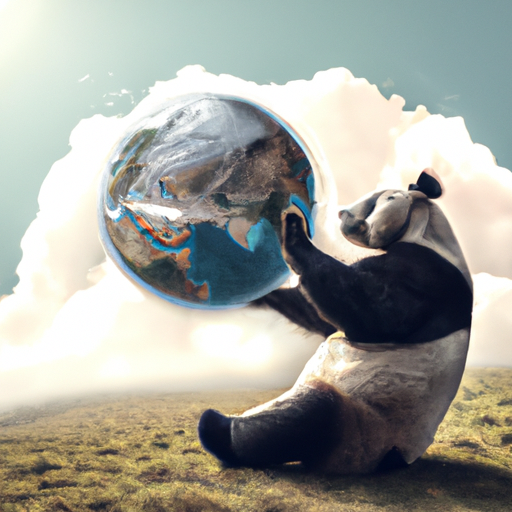

generated_image_2.png


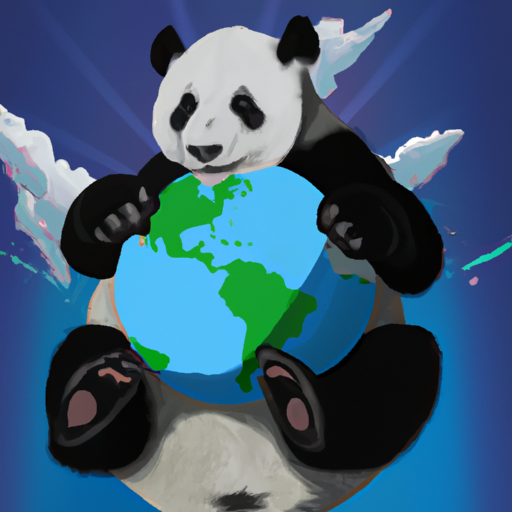

generated_image_3.png


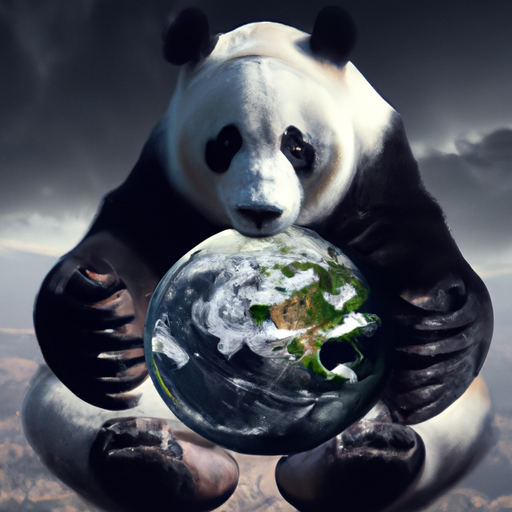

In [9]:
# Print out image paths and the images themselves
for image in sorted(os.listdir(image_dir)):
    
    print(image)
    display(Image.open(os.path.join(image_dir,image)))

## Order Fulfilment

Once the customer has settled on their design, we use Printful to create an order and send it

In [10]:
# Pick an example image from above to simulate the customer choosing an option through the front-end
image_url = generation_response['data'][2]['url']

In [12]:
pf_url = 'https://api.printful.com/'

# Get API Key and create headers
pf_key = os.environ.get("PRINTFUL_API_KEY")
pf_headers = {
    'Authorization': f'Bearer {pf_key}'
}

### Get Store Details

In [13]:
response = requests.get(url='https://api.printful.com/stores',headers = pf_headers)

In [16]:
store_id = response.json()['result'][0]['id']
pf_headers.update({'X-PF-Store-Id': str(store_id)})

### Get Product Templates

In [18]:
template_response = requests.get(url='https://api.printful.com/product-templates',headers = pf_headers)
product_templates = template_response.json()['result']['items']
product_templates

[{'id': 37224943,
  'product_id': 162,
  'external_product_id': None,
  'title': 'Short sleeve t-shirt',
  'available_variant_ids': [6584,
   6585,
   6586,
   6587,
   6588,
   6608,
   6609,
   6610,
   6611,
   6612],
  'option_data': [{'id': 'text_thread_colors_front', 'value': []}],
  'colors': [{'color_name': 'Solid Black Triblend',
    'color_codes': ['#101211']},
   {'color_name': 'White Fleck Triblend', 'color_codes': ['#eaeaea']}],
  'sizes': ['XS', 'S', 'M', 'L', 'XL'],
  'mockup_file_url': 'https://files.cdn.printful.com/upload/product-templates/2f/2f92213e3f18d4a20f00ed22af398ef8_l',
  'placements': [{'placement': 'front',
    'display_name': 'Front print',
    'technique_key': 'DTG',
    'technique_display_name': 'DTG printing'}],
  'created_at': 1670237105,
  'updated_at': 1670237105,
  'placement_option_data': [{'type': 'front', 'options': []}]},
 {'id': 37224634,
  'product_id': 71,
  'external_product_id': None,
  'title': 'Product template example',
  'available_vari

### Make a new Product

We selected product variant 4011 from the above product template, so we'll be making a T-shirt from the image we chose above

In [19]:
sample_object = {
    "recipient": {
        "name": "C Fresh",
        "address1": "6 Boomtown Street",
        "city": "Glasgow",
        "country_code": "GB",
        "zip": "G71 7RY"
    },
    "items": [
        {
            "variant_id": 4015,
            "quantity": 1
        }
    ]
}

In [20]:
# Get placement options
variant_response = requests.get(url='https://api.printful.com/products/variant/4015',headers = pf_headers)
[(x['title'],x['type']) for x in variant_response.json()['result']['product']['files']]

[('Left chest', 'embroidery_chest_left'),
 ('Center chest', 'embroidery_chest_center'),
 ('Left sleeve top', 'embroidery_sleeve_left_top'),
 ('Right sleeve top', 'embroidery_sleeve_right_top'),
 ('Front print', 'front'),
 ('Back print', 'back'),
 ('Outside label', 'label_outside'),
 ('Inside label', 'label_inside'),
 ('Left sleeve', 'sleeve_left'),
 ('Right sleeve', 'sleeve_right'),
 ('Mockup', 'mockup')]

In [21]:
placement = {
    'files': [ {
        "type": "front",
        "url": image_url
            }
    ]
}    
sample_object['items'][0].update(placement)
sample_object

{'recipient': {'name': 'C Fresh',
  'address1': '6 Boomtown Street',
  'city': 'Glasgow',
  'country_code': 'GB',
  'zip': 'G71 7RY'},
 'items': [{'variant_id': 4015,
   'quantity': 1,
   'files': [{'type': 'front',
     'url': 'https://oaidalleapiprodscus.blob.core.windows.net/private/org-p13k3klgno5cqxbf0q8hpgrk/user-bNCqePPoKgqwthLR9466rHnU/img-99c8B3uacC3kCyjpADVYcVZX.png?st=2022-12-06T08%3A38%3A22Z&se=2022-12-06T10%3A38%3A22Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2022-12-06T05%3A51%3A56Z&ske=2022-12-07T05%3A51%3A56Z&sks=b&skv=2021-08-06&sig=Ttkc59VVPPrmVl5uqukpRG3/5DxkUVENfPuK3Vu/Bcs%3D'}]}]}

In [25]:
post_headers = {
    "Content-Type": "application/json",
    'Authorization': f'Bearer {pf_key}',
    'X-PF-Store-Id': str(store_id)
}

In [26]:
post_response = requests.post(url='https://api.printful.com/orders',headers = post_headers,json=sample_object)

In [39]:
if post_response.status_code == 200:
    print(f'''Order created successfully. ID is {post_response.json()['result']['id']}''')
    
else:
    print(f'Sad times, order failed with code {post_response.status_code}')

Order created successfully. ID is 85996318


## Get Variations

Potential extension to this app to get variations of the chosen image

In [40]:
# create variations

# call the OpenAI API, using 'create_variation' rather than 'create'
variation_response = openai.Image.create_variation(
    image = os.path.join(image_dir,sorted(os.listdir(image_dir))[2]),
    n=3,
    size='1024x1024',
    response_format="url"
)

print(variation_response)

InvalidRequestError: Uploaded image must be a PNG and less than 4 MB.